In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("spam.csv", encoding = "ISO-8859-1")#unicode error solution for encoding utf-8 encoding bytes

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2970,ham,Height of Confidence: All the Aeronautics prof...,"this wont even start........ Datz confidence..""",NaN,NaN
2583,ham,"Goodmorning, today i am late for 1hr.",NaN,NaN,NaN
2179,ham,And popping &lt;#&gt; ibuprofens was no help.,NaN,NaN,NaN
2224,ham,"I prefer my free days... Tues, wed, fri oso ca...",NaN,NaN,NaN
2739,ham,Are you this much buzy,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
#steps for the data exploration in this project.
#data cleaning 
#EDA 
#text preprocessing
#evaluation 
#improvement
#website
#deploy

##Data cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#drop 3 column.
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
#renaminig the columns for better understanding 
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
df.sample(5)

,target,text
144,ham,Yes see ya not on the dot
1363,ham,"Yetunde, i'm sorry but moji and i seem too bus..."
2617,ham,I cant pick the phone right now. Pls send a me...
4893,ham,Convey my regards to him
2041,ham,ÌÏ dun wan to watch infernal affair?


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


In [12]:
df['target']=encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#missing value
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
#check for duplicatee value
df.duplicated().sum()

403

In [16]:
#remove duplicate
df=df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

##EDA

In [19]:
##this is used to check which is spam r ham mail in the dataset
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

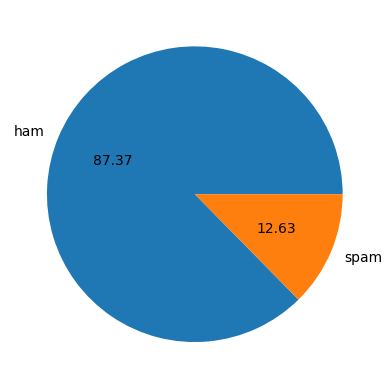

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')##is used to show the % value of datset
plt.show()

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\STUTI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_charchter']=df['text'].apply(len)#ye hm length pata krte h hr sms ka interms of charchter used
#isko hm ek varible mai assign krdenge 

C:\Users\STUTI\AppData\Local\Temp\ipykernel_18936\1450162301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_charchter']=df['text'].apply(len)#ye hm length pata krte h hr sms ka interms of charchter used


In [25]:
df.head() # isse ye hua ki hme ek jisse assign kra tha wo add hogye

,target,text,num_charchter
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
 df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))#this is used to tokenize the sentennce of line

C:\Users\STUTI\AppData\Local\Temp\ipykernel_18936\2123466268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))#this is used to tokenize the sentennce of line


In [27]:
df.head()

,target,text,num_charchter,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df['num_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))#ye len isliye use h ki length find out krne k liye sentence

C:\Users\STUTI\AppData\Local\Temp\ipykernel_18936\883518266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))#ye len isliye use h ki length find out krne k liye sentence


In [29]:
df.head()

,target,text,num_charchter,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_charchter','num_sentence','num_words']].describe()

,num_charchter,num_sentence,num_words
count,5169.000000,5169.000000,5169.000000
mean,78.977945,1.965564,18.455794
std,58.236293,1.448541,13.324758
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,9.000000
50%,60.000000,1.000000,15.000000
75%,117.000000,2.000000,26.000000
max,910.000000,38.000000,220.000000


In [31]:
#to check for ham msgs
df[df['target']==0][['num_charchter','num_sentence','num_words']].describe()

,num_charchter,num_sentence,num_words
count,4516.000000,4516.000000,4516.000000
mean,70.459256,1.820195,17.123782
std,56.358207,1.383657,13.493970
min,2.000000,1.000000,1.000000
25%,34.000000,1.000000,8.000000
50%,52.000000,1.000000,13.000000
75%,90.000000,2.000000,22.000000
max,910.000000,38.000000,220.000000


In [32]:
#check for spam msgs
df[df['target']==1][['num_charchter','num_sentence','num_words']].describe()#isse ye pata chala ki spam k msgs ham ke msg se bde hote h
#in terms of no of charchter

,num_charchter,num_sentence,num_words
count,653.000000,653.000000,653.000000
mean,137.891271,2.970904,27.667688
std,30.137753,1.488425,7.008418
min,13.000000,1.000000,2.000000
25%,132.000000,2.000000,25.000000
50%,149.000000,3.000000,29.000000
75%,157.000000,4.000000,32.000000
max,224.000000,9.000000,46.000000


In [33]:
import seaborn as sns

<Axes: xlabel='num_charchter', ylabel='Count'>

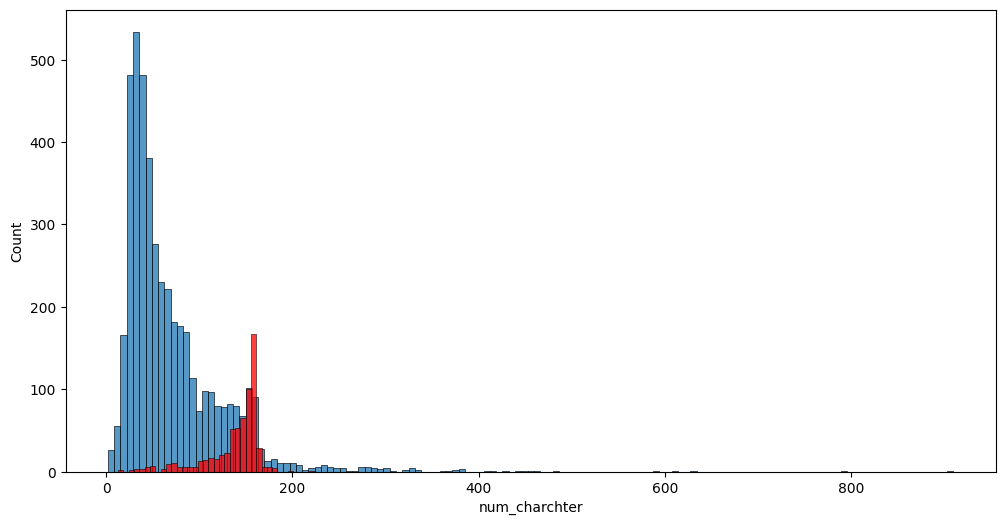

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_charchter'])#isse ye pta chla ki jo ham ka char h wo spam se jyada
sns.histplot(df[df['target']==1]['num_charchter'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

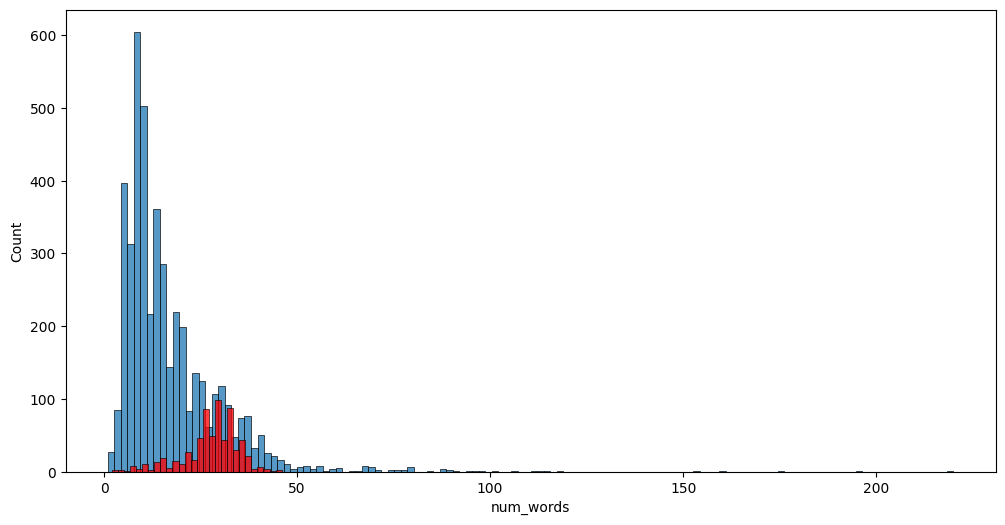

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])#isse ye pta chla ki jo ham ka char h wo spam se jyada
sns.histplot(df[df['target']==1]['num_words'],color='red')

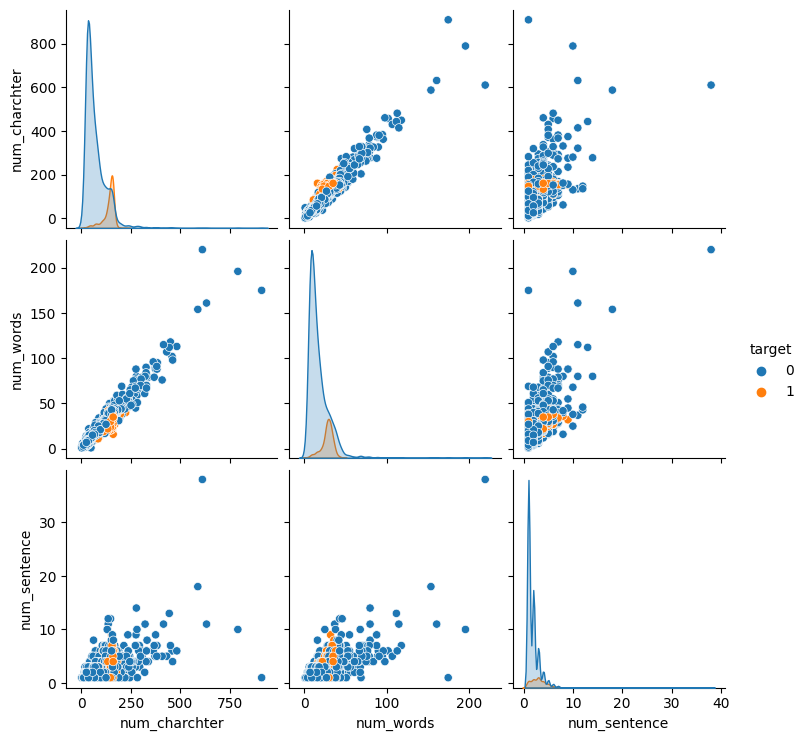

In [36]:
#now we find out the correlation and coefficient relation between them that how the graph actually plot inside the plot
sns.pairplot(df,hue='target')

## Data preprocessing
lower case
tokenization
removing special charchters
removing stop words and punctuation
stemming

In [37]:
#function for lower case
def transform(text):
    text=text.lower()
    return text
    

In [38]:
transform ("Hi ITS You !")

'hi its you !'

In [39]:
#now for tokenization
def transform(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    return text

In [40]:
transform ("Hi ITS You !")

['hi', 'its', 'you', '!']

In [41]:
import nltk
nltk.download('stopwords')# for not having any type of imort just download in the cell of jupyter 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\STUTI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
import string
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [44]:
#removing specail char
def transform(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english')and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return "  ".join(y)


In [45]:
transform ("Hi ITS You ! ##")#remove the special char

NameError: name 'ps' is not defined

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('porter_test')

In [46]:
#stemming
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')#stem ka mtln hi hua ka ki use verbal form ek word ka jais dancing ko dance hi nolte h toh hm usko danc mai lih kr conert krdenge

'danc'

In [47]:
transform ("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")#stemmer exmpleGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

'go  jurong  point  crazi  avail  bugi  n  great  world  la  e  buffet  cine  got  amor  wat'

In [48]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [49]:
df['transformed']=df['text'].apply(transform)

C:\Users\STUTI\AppData\Local\Temp\ipykernel_18936\1433238750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed']=df['text'].apply(transform)


In [50]:
df.head()

,target,text,num_charchter,num_words,num_sentence,transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n grea...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')#iska use hm isliye kiye qki hm chate the kon sa word
#spam mai jyda us eho raha h by using wordcloud


In [52]:
spam_wc=wc.generate (df[df['target']==1]['transformed'].str.cat(sep=" "))

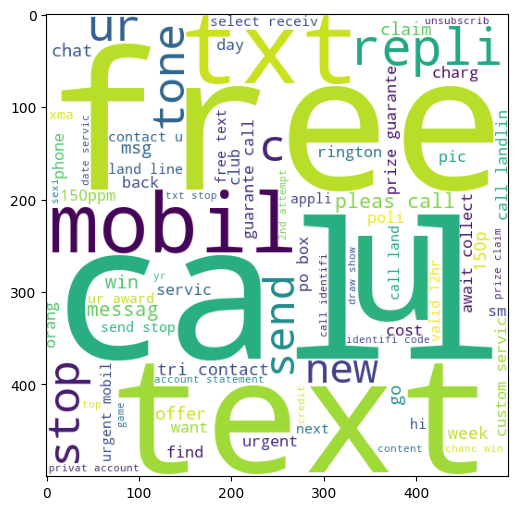

In [53]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)#isme dekho spam msg h jo jyada use ho rahe h jaise=free,txt,new,tri contact,send stop,text,call.......

In [54]:
ham_wc=wc.generate (df[df['target']==0]['transformed'].str.cat(sep=" "))

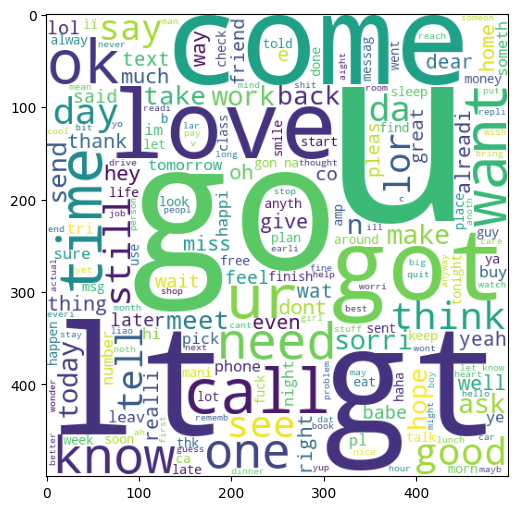

In [55]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)#dekho ham msgmai jo jyad us eho raha h wo h go,love,come,got,good,takehome,time,know,urneed.......

In [56]:
df[df['target']==1]['transformed']

2       free  entri  2  wkli  comp  win  fa  cup  fina...
5       freemsg  hey  darl  3  week  word  back  like ...
8       winner  valu  network  custom  select  receive...
9       mobil  11  month  u  r  entitl  updat  latest ...
11      six  chanc  win  cash  100  pound  txt  csh11 ...
                              ...                        
5537    want  explicit  sex  30  sec  ring  0207316241...
5540    ask  3mobil  0870  chatlin  inclu  free  min  ...
5547    contract  mobil  11  mnth  latest  motorola  n...
5566    remind  o2  get  pound  free  call  credit  de...
5567    2nd  time  tri  2  contact  u  pound  prize  2...
Name: transformed, Length: 653, dtype: object

In [57]:
df[df['target']==1]['transformed'].tolist()

['free  entri  2  wkli  comp  win  fa  cup  final  tkt  21st  may  text  fa  87121  receiv  entri  question  std  txt  rate  c  appli  08452810075over18',
 'freemsg  hey  darl  3  week  word  back  like  fun  still  tb  ok  xxx  std  chg  send  rcv',
 'winner  valu  network  custom  select  receivea  prize  reward  claim  call  claim  code  kl341  valid  12  hour',
 'mobil  11  month  u  r  entitl  updat  latest  colour  mobil  camera  free  call  mobil  updat  co  free  08002986030',
 'six  chanc  win  cash  100  pound  txt  csh11  send  cost  6day  tsandc  appli  repli  hl  4  info',
 'urgent  1  week  free  membership  prize  jackpot  txt  word  claim  81010  c  lccltd  pobox  4403ldnw1a7rw18',
 'xxxmobilemovieclub  use  credit  click  wap  link  next  txt  messag  click  http',
 'england  v  macedonia  dont  miss  news  txt  ur  nation  team  87077  eg  england  87077  tri  wale  scotland  poboxox36504w45wq',
 'thank  subscript  rington  uk  mobil  charg  pleas  confirm  repli  ye 

In [58]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [59]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [60]:
len(spam_corpus)

9939

In [61]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))# isse ye pta chlta h ki hmare corpus kitni bar words repeat hua h

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [62]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [63]:

ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [64]:
len(ham_corpus)

35404

In [65]:
#bag of words ise ye pta chlata h frequent no of words k column bna lete h and check krenge ki kitne bar ye frequent use ho rahe h words
df.head()

,target,text,num_charchter,num_words,num_sentence,transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n grea...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


4.model building

In [66]:
#hm model buliding k liye naive bayes ka use krenge qki ye textual data pe accurate value deti h as compare to other algo

In [93]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv= CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)#this is used to reduce the accuracy for better prescision score 

In [95]:
x=cv.fit_transform(df['transformed']).toarray()

In [69]:
x.shape#5169 sms or 6708 are words

(5169, 6708)

In [70]:
y=df['target'].values

In [71]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [74]:
from sklearn.naive_bayes import GaussianNB ,MultinomialNB, BernoulliNB

In [75]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Precision Score:", precision_score(y_test, y_pred1))


Accuracy: 0.8800773694390716
Confusion Matrix:
 [[792 104]
 [ 20 118]]
Precision Score: 0.5315315315315315


In [76]:
mnb=MultinomialNB()
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("Precision Score:", precision_score(y_test, y_pred2))

Accuracy: 0.9642166344294004
Confusion Matrix:
 [[871  25]
 [ 12 126]]
Precision Score: 0.8344370860927153


In [77]:
bnb= BernoulliNB()#this is performing good other than these two
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))
print("Precision Score:", precision_score(y_test, y_pred3))

Accuracy: 0.9700193423597679
Confusion Matrix:
 [[893   3]
 [ 28 110]]
Precision Score: 0.9734513274336283


In [78]:
#we can go for either bnb OR MNB
#we choose tfidf->mnb

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn .ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier  # Note the correct spelling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [97]:
svc=SVC(kernel='sigmoid',gamma=1.0)#making the object for 8all algo99
knc=KNeighborsClassifier()
mnb= MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='12', random_state=42)
rfc= RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [81]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [82]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    return accuracy,precision

In [83]:
train_classifier(svc,x_train,y_train,x_test,y_test)#we train svc for accuracy 

(0.9264990328820116, 0.7421875)

In [101]:
#voting  classifier
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier


In [85]:
voting= VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [86]:
voting.fit (x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [87]:
y_pred=voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.976


In [88]:
#Applying stacking
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [89]:
from sklearn.ensemble import StackingClassifier

In [90]:
clf=StackingClassifier(estimators,final_estimator=final_estimator)

In [91]:
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9835589941972921
Precision 0.9689922480620154


In [92]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb,open('model.pkl','wb'))